<a href="https://colab.research.google.com/github/cnrhkdgus95gmailcom/SHI-DT-Campus/blob/main/6_8_%EC%88%98_Regression%2C_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음주 금요일에 시험...

주제 ;  머신러닝

전처리, 정확도

어제(6/7 수)는...

Data Standardization ( 표준화 )

오늘은.... 

라벨링을 좀 더 다뤄보고...

문자열을 숫자로 바꿀때...

다르게 하는걸 소개하겠습니다...

In [ ]:
lisT = ['a','b','c','d','b','c','c','a']

# 문자열을 숫자로 바꿔보자

# dic = {}
# box = []

# for i in lisT:
#     if i not in dic:
#         dic[i] = len(dic)
#     box.append(dic[i])
# box
# 좀 번거롭긴 하네요.

문자열에 숫자로 라벨링 해주는 라이브러리가 있습니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

asdf = LabelEncoder()
a = asdf.fit_transform(lisT)
a

array([0, 1, 2, 3, 1, 2, 2, 0])

https://wikidocs.net/29530

카테고리를 원핫으로 변환 (OneHotEncoder)

https://wikidocs.net/84149

섹션 09 데이터 전처리 (pandas)

예)

더미 변수를 생성하면 sex 컬럼의 male 과 female이 

각각 별도의 컬럼으로 생성됩니다.

In [ ]:
lisT = ['a','b','c','d','b','c','c','a']
import pandas as pd
pd.get_dummies(lisT) 

# 머신러닝할땐 pd.get_dummies ...

# one hot encoding

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,1,0,0,0


# titanic

pd.get_dummies( ) 

One Hot Encoding


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv")
del df["Unnamed: 0"]
df = pd.get_dummies(df) # One Hot Encoding

df = df.dropna()
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,False,1,0,...,0,0,0,0,0,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
889,1,1,26.0,0,0,30.0000,True,True,0,1,...,1,0,0,0,0,1,0,0,0,1


# Regression


## KNeighborsRegressor

저번엔 분류모델(KNeighborsClassifier)...

이번엔 회귀를 한다.

생선 길이를 보면 무게 예측하는...

분류랑은 좀 느낌이 다른...

무게는 분류보다 정답이 매우 많죠...

회귀 예측 이라고 하는....

처음엔 KNN 으로 해보자.

' K 최근접 회귀 모델 '

근처 무게를 평균내서 예측하는...

In [ ]:
import matplotlib.pyplot as plt
import pickle
f = open('perch.dat','rb')
perch = pickle.load(f)
p_l, p_w = perch

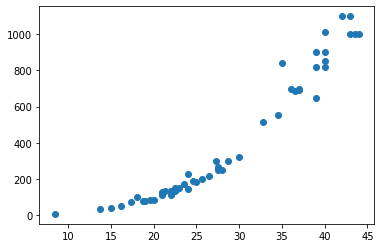

In [ ]:
plt.scatter(p_l, p_w)

In [ ]:
p_l

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

문제집(길이)은 2차원이어야 하죠.

근데 길이가 1차원으로 주어짐.

1차원을 2차원으로 가공해보자.

머신러닝 할때 대부분 상황에서 문제집은 2차원 행렬로 만들어야 한다.

In [ ]:
# 이런 방법도 있고.

box = []
for i in p_l:
    box.append([i])
p_l = np.array(box)
p_l

# 아래는 reshape()를 사용.

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, p_w = perch

p_l = p_l.reshape(-1,1)

In [ ]:
p_l = p_l.reshape(-1,1) 

# (-1,1) ; 행은 자동, 열은 1열

p_l.shape

(56, 1)

cf)머신러닝에서는 대부분 2차원 쓰시고...

딥러닝때는 차원 좀 달라질 수 있다...

예를 들어 사진같은 경우...( Unstructured Data )

reshape ( a, b, c ) ; 3차원

가로, 세로, RGB

### perch.dat

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In statistical modeling, **regression** analysis is 

a set of statistical processes 

for **estimating the relationships**

between a dependent variable


and one or more independent variables

 앞에서 문제지, 정답지 만들었다.

 문제 ; 길이. 정답 ; 무게

 데이터 표준화를 해야하나? 
 
 길이 하나만 있어서 표준화 안 해도 될듯

 데이터 분할 하시고 모델 학습, 평가

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, p_w = perch
p_l = p_l.reshape(-1,1) # 문제집을 2차원으로.

inPut = p_l
target = p_w

train_input, test_input, train_target, test_target = train_test_split(inPut, target)
#input에 길이만 있어서 표준화 안 해도 됨

model = KNeighborsRegressor(n_neighbors = 3)
model.fit(train_input, train_target) 
model.score(test_input, test_target)

0.9484740516166005

In [ ]:
best = 0
for i in range(1,train_input.shape[0]+1):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(train_input, train_target)
    score = model.score(test_input, test_target)
    if score > best:
        best = score
        best_n = i

model = KNeighborsRegressor(n_neighbors = best_n)
model.fit(train_input, train_target) 
model.score(test_input, test_target)
# regressor 라서 score가 마이너스가 나올 수도 있다.

0.9702533798919424

In [ ]:
model.predict(test_input)

array([927.14285714, 125.71428571, 150.42857143, 121.42857143,
       142.14285714, 171.42857143, 125.71428571, 115.        ,
       967.14285714, 811.42857143,  91.14285714, 254.28571429,
       760.85714286, 760.85714286])

In [ ]:
test_target

array([1015.,  120.,  170.,  130.,  150.,  145.,  150.,  125., 1000.,
        650.,   85.,  260.,  700.,  685.])

In [ ]:
abs ( test_target - model.predict(test_input) )

array([ 87.85714286,   5.71428571,  19.57142857,   8.57142857,
         7.85714286,  26.42857143,  24.28571429,  10.        ,
        32.85714286, 161.42857143,   6.14285714,   5.71428571,
        60.85714286,  75.85714286])

In [ ]:
x = np.mean( abs ( test_target - model.predict(test_input) ) )
x
# 예측값과 실제값이 x g 차이 날 수가 있다

38.08163265306124

### boston.dat
RobustScaler

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler

f = open('boston.dat','rb')
boston = pickle.load(f)
f.close()

inPut, target = boston

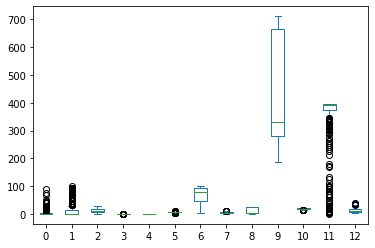

In [ ]:
a = pd.DataFrame(inPut)
a.plot.box()
# outlier가 있어서 RobustScaler가 좋을것 같은...

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler

f = open('boston.dat','rb')
boston = pickle.load(f)
f.close()

inPut, target = boston

best = 0

while best < 0.8 :

    train_input, test_input, train_target, test_target = train_test_split(inPut, target)

    rs = RobustScaler()
    rs.fit(train_input)

    train_scaled = rs.transform(train_input)
    test_scaled = rs.transform(test_input)

    for i in range(1,train_scaled.shape[0]+1):
        model = KNeighborsRegressor(n_neighbors = i)
        model.fit(train_scaled, train_target)
        score = model.score(test_scaled, test_target)
        if score > best:
            best = score

print(best)

0.8046020492837167


In [ ]:
type(inPut[0])

numpy.ndarray

In [ ]:
model.score(test_scaled, test_target)

0.6875463833810502

In [ ]:
inPut.shape

(506, 13)

In [ ]:
target.shape

(506,)

데이터 분할

데이터 표준화

모델 (KNeighborsRegressor)

학습, 평가

## k - NN회귀의 한계

k-nearest neighbors algorithm (k-NN)

### perch.dat (2)

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, p_w = perch
p_l = p_l.reshape(-1,1) # 문제집을 2차원으로.

inPut = p_l
target = p_w

train_input, test_input, train_target, test_target = train_test_split(inPut, target)
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(train_input, train_target) 
model.score(test_input, test_target)

0.9886374166872453

In [ ]:
model.predict([[200]])
# predict값이 계속 커져도 같은 예측을 내는...

array([1033.33333333])

In [ ]:
distances, indexes = model.kneighbors([[50]])
print(distances, indexes)

[[6. 7. 7.]] [[12 38 35]]


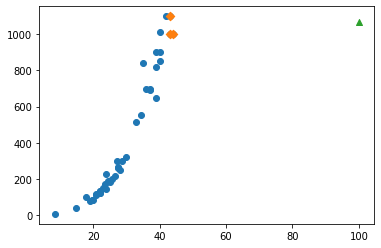

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1066, marker = '^')

KNN 모델은 input이 많이 커지는 경우를 예측하기 힘들다...

곡선을 나타내는 함수를 찾아낼 수 있으면 더 큰 input이 오더라도 예측해 줄 수 있을 듯...

곡선을 찾아보자.

생각보다 간단함.

## LinearRegression

이번엔 선형 회귀 모델

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, p_w = perch
p_l = p_l.reshape(-1,1) # 문제집을 2차원으로.

inPut = p_l
target = p_w

train_input, test_input, train_target, test_target = train_test_split(inPut, target)

In [ ]:
train_input.shape

(42, 1)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(inPut, target)
model = LinearRegression() 

# cf)모델 파라미터에서 n_jobs ; 컴퓨터 코어 개수. -1 주면 최대로 쓴다는 뜻
# n_jobs는 다른 모델에도 있더라...
# 걍 안써도 무방합니다...

model.fit(train_input, train_target) 
model.score(test_input, test_target)

0.9211139552326035

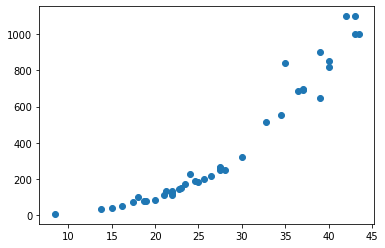

In [ ]:
plt.scatter(train_input, train_target)

In [ ]:
model.coef_ # 기울기

array([35.52801594])

In [ ]:
model.intercept_ # 절편

-607.8128953722999

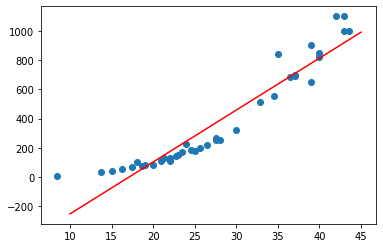

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([10,45],[10*model.coef_ + model.intercept_, 45*model.coef_ + model.intercept_],'r')

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, p_w = perch
p_l = p_l.reshape(-1,1) # 문제집을 2차원으로.

inPut = p_l
target = p_w

train_input, test_input, train_target, test_target = train_test_split(inPut, target)

In [ ]:
train_input**2

곡선으로 만들어볼까...

데이터 상황마다 다르긴 함...

In [ ]:
train_poly = np.column_stack([train_input, train_input**2])
test_poly = np.column_stack([test_input, test_input**2])
model = LinearRegression()
model.fit(train_poly,train_target)
model.score(test_poly,test_target)

In [ ]:
print(model.coef_, model.intercept_)

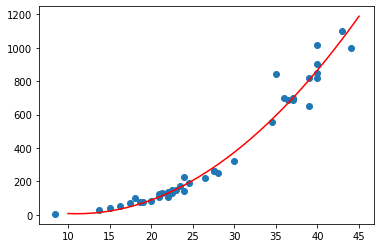

In [ ]:
plt.scatter(train_input, train_target)
x = np.arange(10,46) # x축 만들고 행렬처리
plt.plot(x, -22.76183145 * x + 1.02689664 * (x**2) + model.intercept_,'r')

특성이 더 많아지면 overfitting...될 수 있더라

# Feature Engineering (전처리)
특성공학(전처리)

방금 강제로 데이터를 늘려주었다...

값^2 ... 항상 먹히는건 아니긴 합니다

값을 강제로 늘리는 것 : '특성 공학'

Feature Engineering

값 늘려주는 라이브러리도 있습니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
# poly ; 많은

poly.fit([[2,3]])
poly.transform([[2,3]]) # 1은 기본값...

array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
# poly ; 많은

poly.fit([[2,3]])
poly.transform([[2,3]]) 

array([[2., 3., 4., 6., 9.]])

## perch_2 ; length, height, width

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, perch_weight = perch

## overfitting

In mathematical modeling,

 overfitting is "the production of an analysis 
 
 that corresponds too closely or exactly to a particular set of data, 
 
 and may therefore fail to fit to additional data or predict future observations reliably"

In [ ]:
df = pd.read_csv("https://bit.ly/perch_csv")
df = df.to_numpy()

train_input, test_input, train_target, test_target = train_test_split(df, perch_weight)


poly = PolynomialFeatures(degree=5) # 특성공학을 5제곱까지 허용
poly.fit(train_input) # 특성 3개로 늘릴수 있는게 뭘까?

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

model = LinearRegression()
model.fit(train_poly, train_target) 
print(model.score(train_poly, train_target))
print(model.score(test_poly, test_target))
# train과 차이가 많이 나는 편입니다 (overfitting)

0.9999999912630222
-96.3566813161362


In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

f = open('perch.dat','rb')
perch = pickle.load(f)
f.close()
p_l, perch_weight = perch

df = pd.read_csv("https://bit.ly/perch_csv")
df = df.to_numpy()

train_input, test_input, train_target, test_target = train_test_split(df, perch_weight)

poly = PolynomialFeatures() 
poly.fit(train_input) 

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

model = LinearRegression()
model.fit(train_poly, train_target) 
print(model.score(train_poly, train_target))
print(model.score(test_poly, test_target))

0.9905984046390973
0.7961092791698763


In [ ]:
train_poly.shape

(42, 10)

In [ ]:
train_poly

In [ ]:
train_target.shape

(42,)

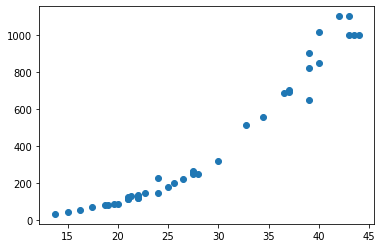

In [ ]:
plt.scatter(train_poly[:,1], train_target)
# plt.plot(train_poly[:,1], train_target)
plt.show()


오늘 4시부터 면담...

402호로...

# Logistic Regression (분류모델)

이름은 회귀지만 분류모델임

확률로 표현이 가능

y = 기울기1 * 생선길이 + 기울기2 * 생선너비 + 절편

y ; 생선 무게

y 를 sigmoid 함수에...

cf) 컴퓨터가 학습하는건 기울기, 절편

## iris by k-NN

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = sns.load_dataset('iris')

a = LabelEncoder()
iris['species'] = a.fit_transform(iris['species'])

data = iris.iloc[:, :-1].to_numpy()
target = iris.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_input_s = ss.transform(train_input)
test_input_s = ss.transform(test_input)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_input_s, train_target)
model.score(test_input_s, test_target)

0.9210526315789473

In [ ]:
model.predict(test_input_s[:5])

array([1, 2, 0, 0, 1])

In [ ]:
model.predict_proba(test_input_s[:5])

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

k-NN 으로는 확률로 나타내기가 애매함

In [ ]:
test_target[:5]

array([1, 2, 0, 0, 1])

## iris by Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris')

a = LabelEncoder()
iris['species'] = a.fit_transform(iris['species']) # species를 숫자로

data = iris.iloc[:, :-1].to_numpy()
target = iris.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

from sklearn.linear_model import LogisticRegression
ss = StandardScaler()
ss.fit(train_input)

train_input_s = ss.transform(train_input)
test_input_s = ss.transform(test_input)

model = LogisticRegression()
model.fit(train_input_s, train_target)
print( model.score(train_input_s, train_target) )
print( model.score(test_input_s, test_target) )

# 학습이 더 잘될 수 있는 가능성은 남아있다,


0.9910714285714286
0.9473684210526315


In [ ]:
model.predict_proba(test_input_s[:5])

array([[2.04168690e-02, 9.44473387e-01, 3.51097445e-02],
       [9.82964264e-01, 1.70350226e-02, 7.13418641e-07],
       [3.24333677e-02, 6.12099661e-01, 3.55466972e-01],
       [1.61134162e-04, 7.68902707e-02, 9.22948595e-01],
       [9.35337219e-01, 6.46596705e-02, 3.11094570e-06]])

In [ ]:
test_target[:5]

array([1, 0, 1, 2, 0])

# Classification Algorithms

지금까지 배운 분류 model 

: k-NN ,Logistic Regrssion

강사님은 k-NN을 좋아하는편

## k-NN

### StandardScaler

In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

df = pd.read_csv("wine.csv")
del df["Unnamed: 0"]
df
data = df.iloc[:, :-1].to_numpy()
target = df.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler()
ss.fit(train_input)
# ss.fit_transform(train_input) 으로 줄여서 갈 수 있다.
train_input_s = ss.transform(train_input)
test_input_s = ss.transform(test_input)

best = 0
for i in tqdm( range(1, 101) ):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_input_s, train_target)
    score = model.score(test_input_s, test_target)

    if score > best:
        best = score
        best_n = i
    
print(f'\nneighbors = {best_n}')
print(best)

100%|██████████| 100/100 [00:05<00:00, 17.36it/s]


neighbors = 1
0.8638461538461538


overfitting ex)
훈련 98%, 시험 89%

강사님은 걍 test score 높은걸로 씀

훈련 89%, 시험 88%

모델을 여러개 써보면서...

In [ ]:
a = pd.DataFrame(data)
a.plot.box()

### RobustScaler

In [578]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

df = pd.read_csv("wine.csv")
del df["Unnamed: 0"]
df
data = df.iloc[:, :-1].to_numpy()
target = df.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

rs = RobustScaler()
rs.fit(train_input)
train_input_s = rs.transform(train_input)
test_input_s = rs.transform(test_input)

best = 0
for i in tqdm( range(1, 101) ):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_input_s, train_target)
    score = model.score(test_input_s, test_target)

    if score > best:
        best = score
        best_n = i
    
print(f'\nneighbors = {best_n}')
print(best)

100%|██████████| 100/100 [00:05<00:00, 16.90it/s]


neighbors = 7
0.8761538461538462


## Logistic Regression

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine.csv")
del df["Unnamed: 0"]
data = df.iloc[:, :-1].to_numpy()
target = df.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

ss = StandardScaler()
ss.fit(train_input)

train_input_s = ss.transform(train_input)
test_input_s = ss.transform(test_input)

model = LogisticRegression()
model.fit(train_input_s, train_target)
print( model.score(train_input_s, train_target) )
print( model.score(test_input_s, test_target) )

0.7766018857032904
0.7992307692307692


In [581]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("wine.csv")
del df["Unnamed: 0"]

data = df.iloc[:, :-1].to_numpy()
target = df.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

rs = RobustScaler()
rs.fit(train_input)

train_input_s = rs.transform(train_input)
test_input_s = rs.transform(test_input)

model = LogisticRegression()
model.fit(train_input_s, train_target)
print( model.score(train_input_s, train_target) )
print( model.score(test_input_s, test_target) )

0.7842775041050903
0.7704615384615384


# Decision Tree (결정트리_분류모델)

분류모델을 하나 더 해보자.

표준화 안 해줘도 됨, 설명력을 가짐, structured data model 중 매우 좋음.

randomforest도 결정트리에서...

랜덤 포레스트... 결정트리보다 성능이 좋더라

k-NN 은 기울기도 설명 안되고

Logistic은 기울기 설명 되지만 그걸론 부족

레시피를 알고 싶다.

비율이 완전히 나뉠때 까지 계속 나누더라 ...

결정 트리(decision tree)는 의사 결정 규칙과 그 결과들을 

트리 구조로 도식화한 의사 결정 지원 도구의 일종이다. 

결정 트리는 운용 과학, 그 중에서도 의사 결정 분석에서 

목표에 가장 가까운 결과를 낼 수 있는 전략을 찾기 위해 주로 사용된다.

In [583]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

df = pd.read_csv("wine.csv")
del df["Unnamed: 0"]
data = df.iloc[:, :-1].to_numpy()
target = df.iloc[:, -1].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target)

model = DecisionTreeClassifier()
model.fit(train_input,train_target)

print( model.score(train_input,train_target) ) # overfitting
print( model.score(test_input,test_target) ) 

0.9975369458128078
0.8627692307692307


In [ ]:
df

# 레드 와인, 화이트 와인
# 일반적으로 화이트와인이 레드와인보다 더 달콤함.

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


Decision Tree는

overfitting이 굉장히 쉽게 일어나는 편입니다.

cf) 다음주 월요일 고용노동부에서 시험치러 온다.

클래스 안나올듯...

하지만 https://wikidocs.net/book/922 

(초보자를 위한 파이썬 300제)

이건 다 풀어보시는게 좋을것 같네요..

In [ ]:
plt.figure( figsize=(10,7) )
plot_tree(model)
plt.show()

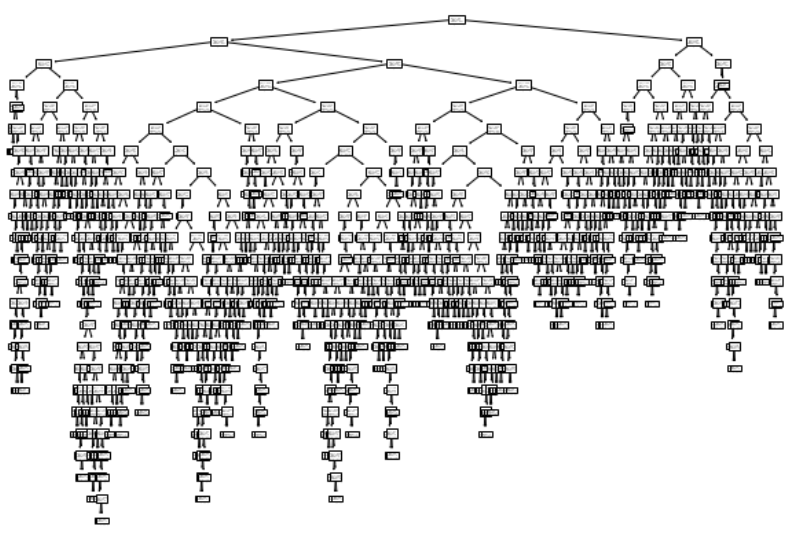

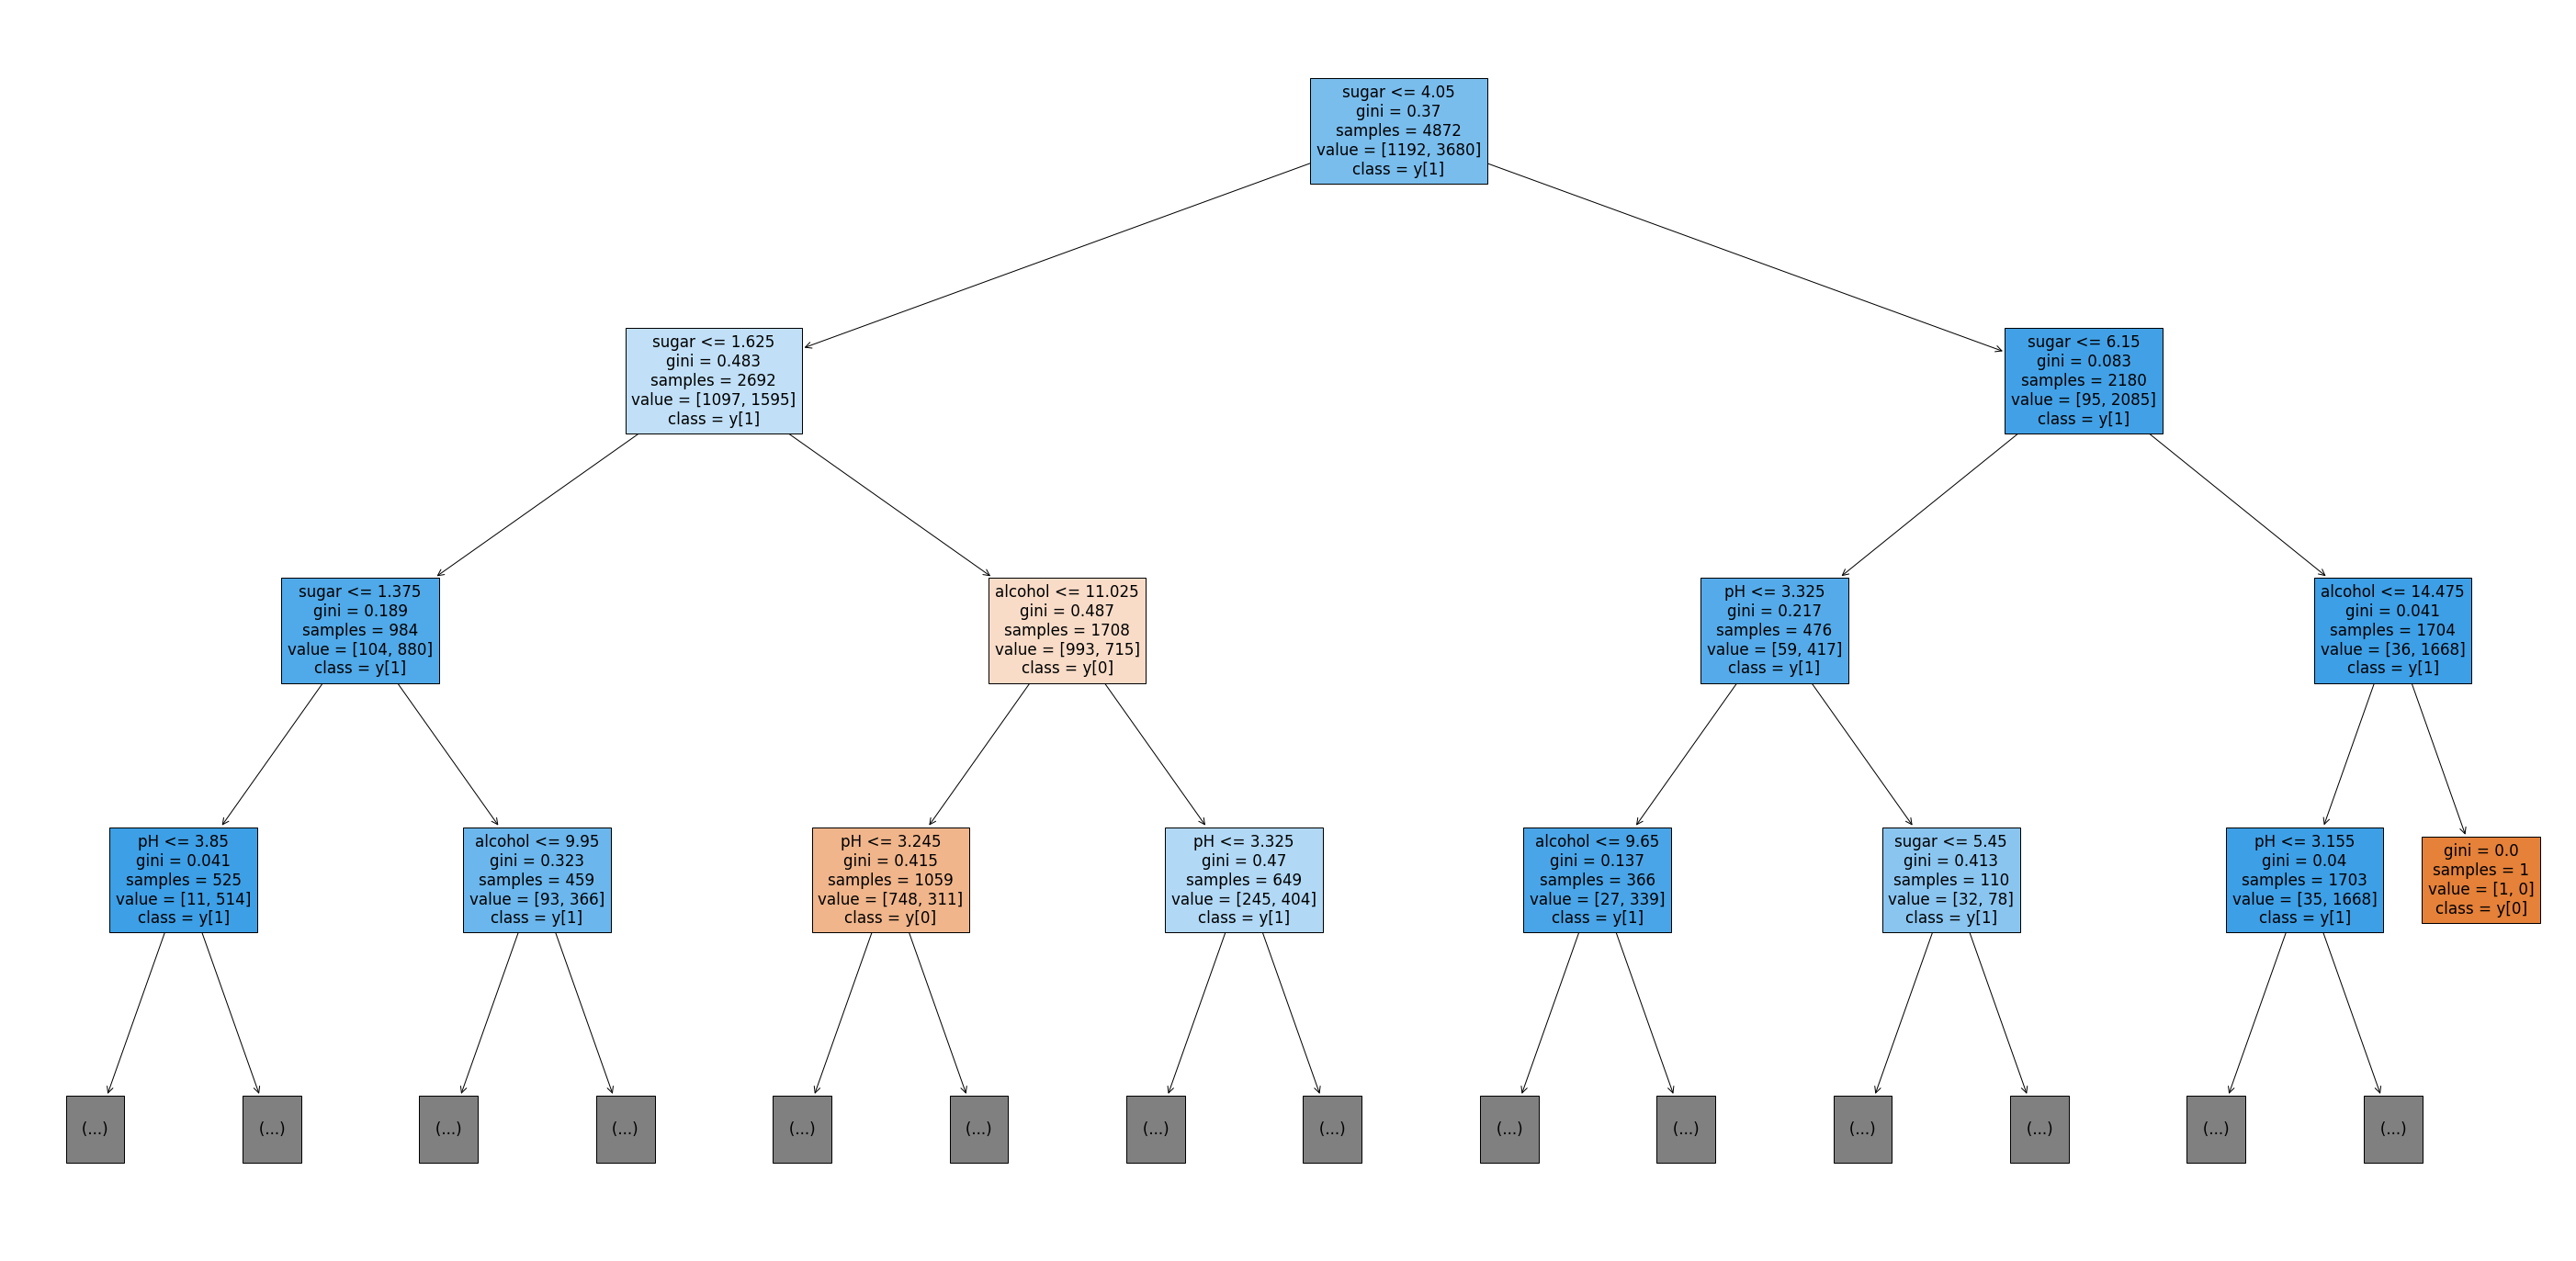

In [ ]:
plt.figure( figsize=(50,25) )
target_name = np.array(['white', 'red'])
plot_tree(model, max_depth = 3, filled = True, feature_names = ['alcohol','sugar','pH'],
          class_names = True)

plt.show()

overfitting을 막고...

그다음 randomforest 할 예정임..

월요일 시험 (책 없이 쳐야함)

10문제 정도 나올듯...

2시간 정도 시간 줄듯...

In [ ]:
# Ex)

for i in range(1,11):
    if i % 2 == 0:
        print(i)

# 출력되는 숫자를 적으세요
# 답: 2,4,6,8,10

2
4
6
8
10
